# Exercises 3.2: linear regression

### PA Women in Tech: Intro to Data Science with Python

In these exercises we will look at creating a **linear regression model** using the dataset that we explored in exercises 3.1. We will:
- create a test and train split
- create a linear regression model
- evaluate the model

First, we import the NumPy, pandas and Matplotlib libraries and load the dataset into a pandas dataframe. We'll also take a look at the first five lines.

We also use the command `%matplotlib inline`. This is a Python [_magic function_ ](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) which ensures any generated Matplotlib plots are displayed in the Notebook.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
df_USAhousing = pd.read_csv("USA_Housing.csv")

In [15]:
df_USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


## Training a linear regression model

Linear regression is a supervised machine learning process, where we try to predict a continuous value. Linear regression defines the relationship between a target variable (`y`) and a set of predictive features (`X`). Simply stated, if you need to predict a number, then use regression. 

Let's now begin to train our regression model! We will need to first split up our data into an `X` array that contains the features to train on, and a `y` array with the target variable, in this case the `Price` column. We will not consider the `Address` column because it only has text info that the linear regression model can't use.

1. Define the features `X` (the input features) and label `y` (the output feature)

In [16]:
X = df_USAhousing.drop(columns=["Price", "Address"])
y = df_USAhousing['Price']

X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

## Train test split

Next, we'll split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

#### What is Random State? 
If an integer for random state is not specified in the code, then every time the code is executed, a new random value is generated and the train and test datasets will have different values each time.  However, if a fixed value is assigned - such as `random_state = 0` or `1` or `101` or any other integer - then no matter how many times you execute your code, the result would be the same, e.g. the same values will be in the train and test datasets.

2. Generate the test and train datasets from your `X` and `y` data, with 40% of the data for testing

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

## Creating and training the model

3a. Import `LinearRegression` from the `sklearn.linear_model` module

In [18]:
from sklearn.linear_model import LinearRegression

3b. Initalise the linear regression model

In [19]:
lm = LinearRegression()

3c. Train the model with your training data

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

## Model results

Let's have a look at the intercept and coefficients of our model, which tell us the equation for a straight line:

$$ \widehat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 ...$$

where $\theta_0$ is the constant (intercept), $\theta_0, \theta_0$... are the coefficients, $x_1, x_2$... are the independent variables and $\widehat{y}$ is the dependent variable (the house price).

4a. Print the intercept of the model

In [21]:
lm.intercept_

-2646115.7908026734

4b. Show the coefficients for each of the input variables, storing it in a variable

In [23]:
lm.coef_

array([2.15721784e+01, 1.65410685e+05, 1.21194704e+05, 2.69859483e+03,
       1.52803812e+01])

In [29]:
coefficient_df = pd.DataFrame(lm.coef_, X.columns, columns=['coefficient'])
coefficient_df

,coefficient
Avg. Area Income,21.572178
Avg. Area House Age,165410.684933
Avg. Area Number of Rooms,121194.704444
Avg. Area Number of Bedrooms,2698.594828
Area Population,15.280381


## Interpreting the coefficients

Let's evaluate the model by checking out its coefficients that we found above and how we can interpret them.

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.



## Predictions from our model

Let's use our test data to make some house price predictions with our model, and see how well it does!

5a. Use the trained model to predict house price on the test set

In [30]:
predictions = lm.predict(X_test)

5b. Plot the predicted house prices against the actual house price using `plt.scatter()`

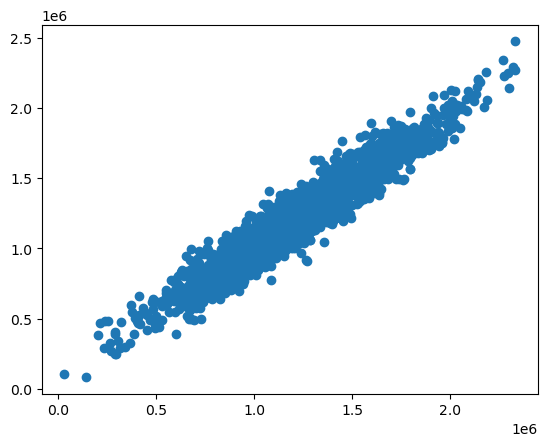

In [31]:
plt.scatter(y_test, predictions)

## Regression evaluation metrics

Now we will try and evaluate our model.

To quantify the performance of the linear regression model, evaluation metrics can be used to measure the actual discrepancy between the predicted values and actual values on our unseen test set.

The discrepancy between each predicted value and the actual value is the **residual error**.

Here are three common evaluation metrics for regression problems:

* **Mean Absolute Error** (MAE) is the mean of the absolute value of the residual errors

* **Mean Squared Error** (MSE) is the mean of the squared residual errors

* **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared residual errors

Comparing these metrics:

- **MAE** is the easiest to understand, because it's simply the average error
- **MSE** is more popular than MAE, because MSE "punishes" larger errors (as it squares each one), which tends to be useful in the real world
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units

All of these are **loss functions**, because we want to minimize them.

6a. Import the `metrics` module from `sklearn`

In [32]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 82846.55865610449


In [35]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 10627724452.956316


In [47]:
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions)):,.2f}")


RMSE: 103,090.86


6b. Evaluate the MAE, MSE and RMSE of the trained model making use of the the `metrics` module `.mean_absolute_error()` and `.mean_squared_error()` methods

Hint: the NumPy `.sqrt()` method may also come in handy

In [54]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

103090.85533138386

In [55]:
#metrics.mean_squared_error(y_test, predictions)

10627724452.956316

In [57]:
len(predictions)

2000

In [63]:
X_test['Price'] = y_test
X_test['Price Prediction'] = predictions
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Price Prediction
2764,75012.341660,6.742828,6.604335,4.10,42877.424147,1.413580e+06,1.554058e+06
4767,76187.273309,6.156222,7.166149,3.32,45084.394236,1.618721e+06,1.582080e+06
3814,67622.219611,5.813928,5.071112,4.16,35359.848465,8.413925e+05,9.404586e+05
3499,66933.165273,4.748787,5.879803,2.09,41834.042941,8.814439e+05,9.407597e+05
2735,65192.105635,6.275509,8.017889,4.47,26228.394577,1.174748e+06,1.182824e+06
...,...,...,...,...,...,...,...
4372,85207.425055,7.031501,7.345308,5.31,40946.070846,2.024121e+06,1.885293e+06
3401,74855.458231,6.778507,6.381776,4.16,32549.675997,1.371312e+06,1.371952e+06
1239,69245.885779,5.707600,6.308777,2.10,37597.868408,1.173414e+06,1.136534e+06
437,44688.563816,5.480142,6.485366,3.17,25120.992029,2.917242e+05,4.027929e+05


How did you do?